# Model Training

## 1. Import data and required libraries

In [2]:
# Basic import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Modeling
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

# Evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
# Read the dataset
df = pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 2. Prepare the data for modeling

In [4]:
# Adding columns for total score and average score
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [5]:
# Define features and target variable
X = df.drop(columns=['total_score', 'average_score'])
y = df['average_score']

In [8]:
# Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numerical_features = X.select_dtypes(exclude='object').columns.to_list()
categorical_features = X.select_dtypes(include='object').columns.to_list()

standard_scaler = StandardScaler()
one_hot_encoder = OneHotEncoder(drop='first')

prerocessor = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', one_hot_encoder, categorical_features),
        ('StandardScaler', standard_scaler, numerical_features)
    ]
)

In [10]:
prerocessor

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('OneHotEncoder', ...), ('StandardScaler', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``f

In [9]:
X_preprocessed = prerocessor.fit_transform(X)

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape} | X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape} | y_test shape: {y_test.shape}")

X_train shape: (800, 15) | X_test shape: (200, 15)
y_train shape: (800,) | y_test shape: (200,)


## 3. Create an evaluation function

In [16]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

## 4. Train the regression models

In [22]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Support Vector Regressor": SVR(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor()
}

model_list = []
r2_list = []
print("-" * 75)
for model_idx in range(len(list(models))):
    model = list(models.values())[model_idx]
    model_name = list(models.keys())[model_idx]
    if isinstance(model, CatBoostRegressor):
        model.fit(X_train, y_train, verbose=False)
    else:
        model.fit(X_train, y_train)

    # Predict on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evalute the model
    train_mae, train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_mse, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

    print(f"Model: {model_name}")
    model_list.append(model_name)
    r2_list.append(test_r2)
    print(f"  Model Performance:")
    print(f"    Train --> MAE: {train_mae:.4f} | MSE: {train_mse:.4f} | RMSE: {train_rmse:.4f} | R^2: {train_r2:.4f}")
    print(f"    Test --> MAE: {test_mae:.4f} | MSE: {test_mse:.4f} | RMSE: {test_rmse:.4f} | R^2: {test_r2:.4f}")
    print("-" * 75)

---------------------------------------------------------------------------
Model: Linear Regression
  Model Performance:
    Train --> MAE: 0.0000 | MSE: 0.0000 | RMSE: 0.0000 | R^2: 1.0000
    Test --> MAE: 0.0000 | MSE: 0.0000 | RMSE: 0.0000 | R^2: 1.0000
---------------------------------------------------------------------------
Model: Ridge Regression
  Model Performance:
    Train --> MAE: 0.0065 | MSE: 0.0001 | RMSE: 0.0080 | R^2: 1.0000
    Test --> MAE: 0.0067 | MSE: 0.0001 | RMSE: 0.0088 | R^2: 1.0000
---------------------------------------------------------------------------
Model: Lasso Regression
  Model Performance:
    Train --> MAE: 0.8506 | MSE: 1.1332 | RMSE: 1.0645 | R^2: 0.9943
    Test --> MAE: 0.8769 | MSE: 1.2414 | RMSE: 1.1142 | R^2: 0.9942
---------------------------------------------------------------------------
Model: Support Vector Regressor
  Model Performance:
    Train --> MAE: 0.9098 | MSE: 9.1525 | RMSE: 3.0253 | R^2: 0.9541
    Test --> MAE: 1.4384 | 

In [26]:
pd.DataFrame({'Model': model_list, 'R^2 Score': r2_list}).sort_values(by='R^2 Score', ascending=False)

,Model,R^2 Score
0,Linear Regression,1.000000
1,Ridge Regression,1.000000
8,CatBoost Regressor,0.994682
7,XGBoost Regressor,0.994600
5,Random Forest Regressor,0.994220
2,Lasso Regression,0.994209
4,Decision Tree Regressor,0.988299
6,AdaBoost Regressor,0.978976
9,K-Nearest Neighbors Regressor,0.968931
3,Support Vector Regressor,0.856574


In [32]:
catboost_model = CatBoostRegressor(
    iterations=5000,
    learning_rate=0.03,
    depth=6,
    l2_leaf_reg=5,
    subsample=0.8,
    colsample_bylevel=0.8,
    loss_function="RMSE",
    random_state=42,
    verbose=0
)

catboost_model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    early_stopping_rounds=200
)

In [33]:
y_pred = catboost_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2:  {r2:.4f}")

MAE:  0.3349
RMSE: 1.2496
R^2:  0.9927


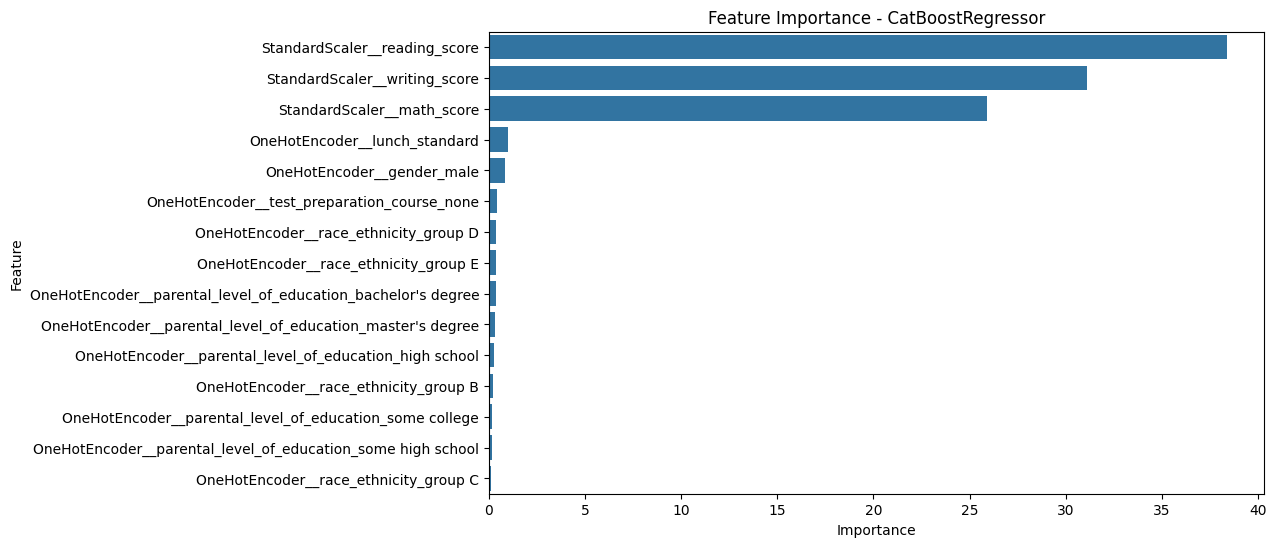

In [40]:
# Feature Importance
feature_names = prerocessor.get_feature_names_out()
importances = catboost_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - CatBoostRegressor')
plt.show()

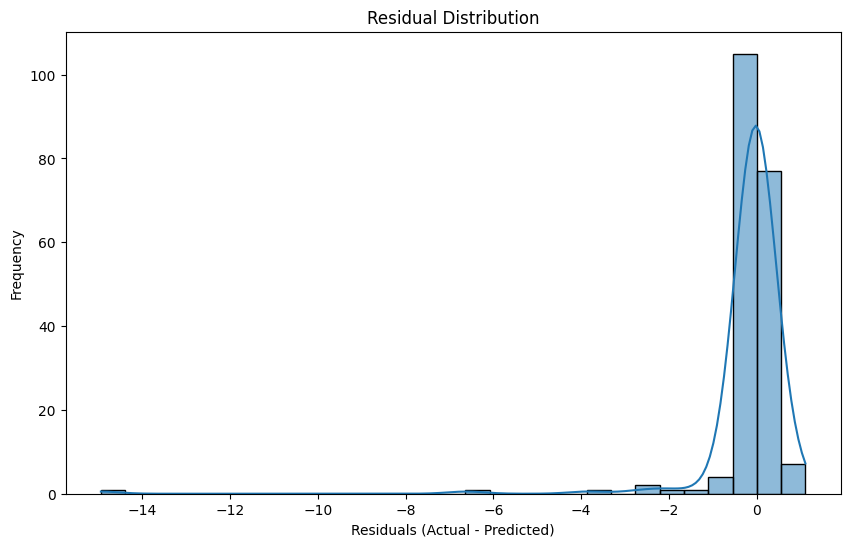

In [41]:
# Residual Analysis
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()

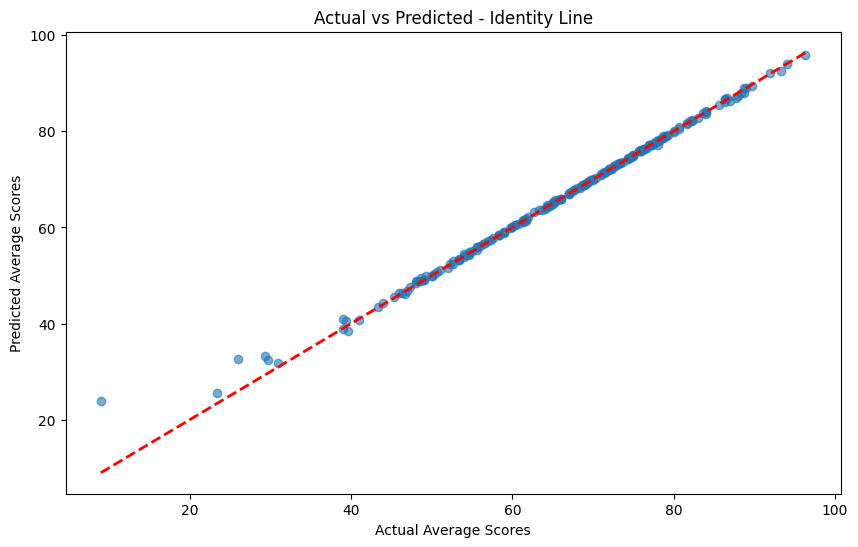

In [42]:
# Enhanced Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Average Scores')
plt.ylabel('Predicted Average Scores')
plt.title('Actual vs Predicted - Identity Line')
plt.show()